In [1]:
!pip install transformers
!pip install simpletransformers
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# from simpletransformers.classification im`port ClassificationModel
import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, GRU
from nltk import ngrams
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import re
import string
import os
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
# from nltk.corpus import omw-1.4
import tensorflow_hub as hub
import tensorflow_text as text
! pip install -U git+https://github.com/huggingface/transformers.git
! pip install -U git+https://github.com/huggingface/accelerate.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 70.8 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.1 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=d579716d2c3ee9ff84a3779a2f620ac4d6ccff930d8e95b3337bcbbb334db320
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=5d23886ffe2c12c24d6644d16f135730b23b473ff264959939ad212badcb

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-4fc7wy1i
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-4fc7wy1i
  Resolved https://github.com/huggingface/transformers.git to commit 05cda5df3405e6a2ee4ecf8f7e1b2300ebda472e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.32.0.dev0-py3-none-any.whl size=7447666 sha256=9d6576f0db159893238567f2537774dd9ad534a23c4b5effed474c702f21e6b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3zui80x/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninsta

In [2]:
def load_dataset(file_name):
    data = []
    with open(file_name, encoding='utf8') as f:
        for line in f:
            example = json.loads(line)
            # uuid = example['uuid']
            post_text = example['postText'][0]
            title = example['targetTitle']
            paragraphs = ' '.join(example['targetParagraphs'])
            label = example['tags'][0] if 'tags' in example else None

            if label in ['phrase', 'multi', 'passage']:
                # data.append({'uuid': uuid, 'text': post_text + ' - ' + title + paragraphs, 'labels': label})
                data.append({'text': post_text + ' - ' + paragraphs, 'labels': label})
    
    return pd.DataFrame(data)

train_data = load_dataset('/kaggle/input/clickbait-detection-msci641-s23/train.jsonl')
validation_data = load_dataset('/kaggle/input/clickbait-detection-msci641-s23/val.jsonl')
test_data = load_dataset('/kaggle/input/clickbait-detection-msci641-s23/test.jsonl')
train_data_normal = train_data['labels']
validation_data_normal = validation_data['labels']
train_data['labels'] = train_data['labels'].replace(['phrase', 'multi', 'passage'],[0,1,2])
validation_data['labels'] = validation_data['labels'].replace(['phrase', 'multi', 'passage'],[0,1,2])

In [3]:
train_data
clickbait_text_data = [train for train in train_data['text']]

In [4]:
# exploratory data analysis
def word_frequency_analysis(text_data, n_top_words=10):
    vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
    word_counts = vectorizer.fit_transform(text_data)
    words = np.array(vectorizer.get_feature_names_out())
    word_frequencies = np.asarray(word_counts.sum(axis=0)).squeeze()
    sorted_indices = np.argsort(word_frequencies)[::-1]
    top_words = [(words[i], word_frequencies[i]) for i in sorted_indices[:n_top_words]]
    return top_words

clickbait_text_data = [re.sub(r'[^a-zA-Z0-9\s]', '', train) for train in train_data['text']]
clickbait_top_words = word_frequency_analysis(clickbait_text_data)
print("Top words in clickbait titles:")
for word, frequency in clickbait_top_words:
    print(f"{word}: {frequency}")

Top words in clickbait titles:
one: 5068
said: 4647
like: 4090
people: 4050
new: 3156
time: 3115
also: 3045
would: 2997
get: 2830
first: 2363


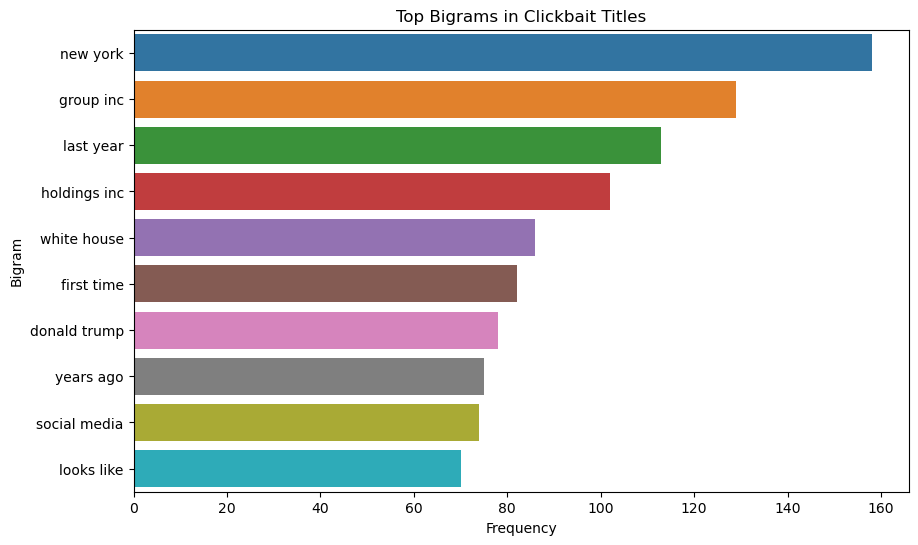

In [5]:
def ngram_analysis(text_data, n=2, n_top_ngrams=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stopwords.words('english'))
    ngram_counts = vectorizer.fit_transform(text_data)
    ngrams_list = vectorizer.get_feature_names_out()
    ngram_frequencies = zip(ngrams_list, ngram_counts.toarray().sum(axis=0))
    sorted_ngram_frequencies = sorted(ngram_frequencies, key=lambda x: x[1], reverse=True)
    top_ngrams = sorted_ngram_frequencies[:n_top_ngrams]
    
    # Convert top ngrams to pandas DataFrame
    df_top_ngrams = pd.DataFrame(top_ngrams, columns=['Ngram', 'Frequency'])
    
    return df_top_ngrams

# Call the ngram_analysis function and get the top bigrams for clickbait and non-clickbait titles
clickbait_top_bigrams = ngram_analysis(clickbait_text_data[: 1000], n=2)

# Visualize the top bigrams in clickbait titles
plt.figure(figsize=(10, 6))
sns.barplot(data=clickbait_top_bigrams, x='Frequency', y='Ngram')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top Bigrams in Clickbait Titles')
plt.show()

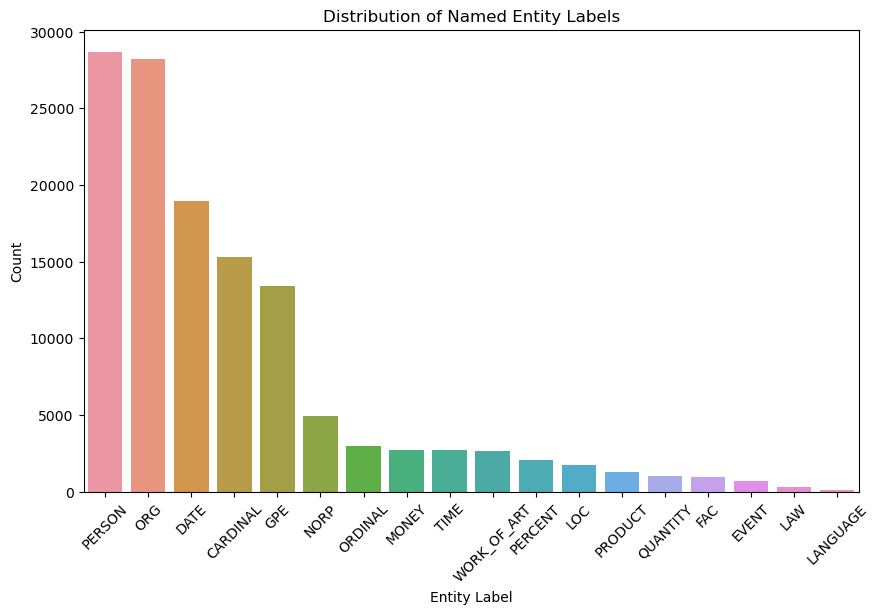

In [6]:
# Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

def ner_analysis(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

train_data['entities'] = train_data['text'].apply(ner_analysis)

# Additional Data Analysis and Visualization
# Example: Distribution of Named Entity Labels
entity_labels = [ent[1] for entities in train_data['entities'] for ent in entities]
entity_counts = pd.Series(entity_labels).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.xlabel('Entity Label')
plt.ylabel('Count')
plt.title('Distribution of Named Entity Labels')
plt.xticks(rotation=45)
plt.show()

In [4]:
train_text = train_data['text']
validation_text = validation_data['text']

def tokenize_text(text):
    return text.split()

train_tokens = train_text.apply(tokenize_text)
val_tokens = validation_text.apply(tokenize_text)

def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

train_tokens = train_tokens.apply(lowercase_tokens)
val_tokens = val_tokens.apply(lowercase_tokens)

def remove_punctuations(tokens):
    cleaned_tokens = []
    for token in tokens:
        for char in string.punctuation:
            token = token.replace(char, '')
        cleaned_tokens.append(token)
    return cleaned_tokens

train_tokens = train_tokens.apply(remove_punctuations)
val_tokens = val_tokens.apply(remove_punctuations)

def remove_numbers(tokens):
    cleaned_tokens = []
    for token in tokens:
        for digit in string.digits:
            token = token.replace(digit, '')
        if token != '':
            cleaned_tokens.append(token)
    return cleaned_tokens

train_tokens = train_tokens.apply(remove_numbers)
val_tokens = val_tokens.apply(remove_numbers)

# print("All stopwords of the English language:")
# print(", ".join(stopwords.words('english')))

def remove_stopwords(tokens):
    stop = stopwords.words('english')
    return [token for token in tokens if token not in stop]

# train_tokens = train_tokens.apply(remove_stopwords)
# val_tokens = val_tokens.apply(remove_stopwords)

def remove_spaces(tokens):
    return [token.strip() for token in tokens]

train_tokens = train_tokens.apply(remove_spaces)
val_tokens = val_tokens.apply(remove_spaces)

lemmatizer = WordNetLemmatizer()

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

train_tokens = train_tokens.apply(lemmatize_tokens)
val_tokens = val_tokens.apply(lemmatize_tokens)

train_preprocessed_nlp = train_tokens.apply(lambda tokens: ' '.join(token + ' ' for token in tokens))
val_preprocessed_nlp = val_tokens.apply(lambda tokens: ' '.join(token + ' ' for token in tokens))
print(val_preprocessed_nlp.shape)

# freq_dist = {}
# for tokens in train_preprocessed.head(20):
#     word_tokens = tokens.split()
#     for token in word_tokens:
#         freq_dist[token] = freq_dist.get(token, 0) + 1

# print(freq_dist)

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
def train_process(df):
    list1=[]
    for x in train_preprocessed_nlp:
        list1.append([x])
    return np.asarray(list1)
train_preprocessed = train_process(train_preprocessed_nlp)
print(len(train_preprocessed))

def val_process(df):
    list1=[]
    for x in val_preprocessed_nlp:
        list1.append([x])
    return np.asarray(list1)
val_preprocessed = val_process(val_preprocessed_nlp)
print(len(val_preprocessed))

3200
400


In [6]:
import numpy as np

from keras.utils import to_categorical
def label_process(df):
    list1=[]
    for x in df['labels']:
        list1.append(x)
    return list1
train_data_labels = to_categorical(np.asarray(label_process(train_data)), num_classes=3)
validation_data_labels = to_categorical(np.asarray(label_process(validation_data)), num_classes=3)
print(train_data_labels.shape)
print(validation_data_labels.shape)

(3200, 3)
(400, 3)


In [7]:
# TF-IDF
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the training and validation data into TF-IDF feature vectors
train_features = vectorizer.fit_transform(train_preprocessed_nlp)
validation_features = vectorizer.transform(val_preprocessed_nlp)

In [8]:
print("Number of features extracted")
print(len(vectorizer.get_feature_names_out()))
print()
print("The 100 features extracted from TF-IDF ")
print(vectorizer.get_feature_names_out()[:100])

Number of features extracted
56187

The 100 features extracted from TF-IDF 
['aa' 'aaa' 'aaap' 'aac' 'aadjust' 'aafa' 'aal' 'aaliyah' 'aaltman' 'aame'
 'aamir' 'aan' 'aand' 'aaoi' 'aaon' 'aap' 'aapl' 'aar' 'aarhus' 'aaron'
 'aaronkleinshow' 'aaronpaul' 'aarp' 'aarti' 'aastrom' 'aat' 'aau' 'aav'
 'aavl' 'aaww' 'ab' 'aba' 'ababa' 'abac' 'aback' 'abacus' 'abaddon'
 'abandon' 'abandoncelebrity' 'abandoned' 'abandoning' 'abandonment'
 'abargh' 'abarra' 'abashed' 'abated' 'abatement' 'abax' 'abaxis' 'abaya'
 'abb' 'abba' 'abbas' 'abbe' 'abbessthegoddess' 'abbey' 'abbi' 'abbott'
 'abbottabad' 'abbotts' 'abbreviated' 'abbreviation' 'abbv' 'abbvie'
 'abby' 'abc' 'abcb' 'abccom' 'abcd' 'abco' 'abcourt' 'abcw'
 'abcwashington' 'abd' 'abdc' 'abdel' 'abdellahi' 'abdi' 'abdicated'
 'abdirahman' 'abdomen' 'abdominal' 'abducted' 'abduction' 'abduljabbar'
 'abdullah' 'abdur' 'abed' 'abedin' 'abedins' 'abeds' 'abeera' 'abeeras'
 'abella' 'abelxo' 'abengoa' 'abeo' 'abeona' 'abercombie' 'abercrombie']


In [9]:
train_processed_features=train_features.toarray()
val_processed_features=validation_features.toarray()

In [13]:
clf_tfidf = RandomForestClassifier()

# num_epochs = 10
# for epoch in range(num_epochs):
clf_tfidf.fit(train_processed_features, train_data['labels'])  
predictions_tfidf = clf_tfidf.predict(val_processed_features)
accuracy_tfidf = accuracy_score(validation_data['labels'], predictions_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_tfidf}")
    
    # Print a few example predictions and their corresponding true labels
print("Example Predictions using TF-IDF:")
for text, true_label, predicted_label in list(zip(val_processed_features, validation_data['labels'], predictions_tfidf))[:5]:
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    

Accuracy (TF-IDF): 0.4775
Example Predictions using TF-IDF:
True Label: 2
Predicted Label: 0
True Label: 1
Predicted Label: 2
True Label: 0
Predicted Label: 0
True Label: 1
Predicted Label: 2
True Label: 2
Predicted Label: 2


In [14]:
# Logistic Regression
clf_lr = LogisticRegression()
# num_epochs = 10
# for epoch in range(num_epochs):
clf_lr.fit(train_processed_features, train_data['labels'])
predictions_lr = clf_lr.predict(val_processed_features)
accuracy_lr = accuracy_score(validation_data['labels'], predictions_lr)  
print("Accuracy (Logistic Regression):", accuracy_lr)

# Print a few example predictions and their corresponding true labels
print("Example Predictions using Logistic Regression:")
for text, true_label, predicted_label in list(zip(val_processed_features, validation_data['labels'], predictions_lr))[:5]:
    # print("Text:", text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("----------------------")

Accuracy (Logistic Regression): 0.4975
Example Predictions using Logistic Regression:
True Label: 2
Predicted Label: 0
----------------------
True Label: 1
Predicted Label: 2
----------------------
True Label: 0
Predicted Label: 1
----------------------
True Label: 1
Predicted Label: 1
----------------------
True Label: 2
Predicted Label: 2
----------------------


In [15]:
# SVM
clf_svm = SVC()
# num_epochs = 10
# for epoch in range(num_epochs):
clf_svm.fit(train_processed_features, train_data['labels'])
predictions_svm = clf_svm.predict(val_processed_features)

accuracy_svm = accuracy_score(validation_data['labels'], predictions_svm)

print("Accuracy (SVM):", accuracy_lr)

# Print a few example predictions and their corresponding true labels
print("Example Predictions using SVM:")
for text, true_label, predicted_label in list(zip(val_processed_features, validation_data['labels'], predictions_svm))[:5]:
    # print("Text:", text)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("----------------------")


Accuracy (SVM): 0.4975
Example Predictions using SVM:
True Label: 2
Predicted Label: 0
----------------------
True Label: 1
Predicted Label: 2
----------------------
True Label: 0
Predicted Label: 1
----------------------
True Label: 1
Predicted Label: 2
----------------------
True Label: 2
Predicted Label: 2
----------------------


In [11]:
# Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(train_processed_features, train_data['labels'])
predictions_nb = clf_nb.predict(val_processed_features)

accuracy_nb = accuracy_score(validation_data['labels'], predictions_nb)
print('First 20 actual labels:', train_data['labels'].tolist()[:20])
print('First 20 predicted labels:', predictions_nb.tolist()[:20])
print("Accuracy (MNB):", accuracy_nb)

# Convert labels to numeric representation for softmax
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_data['labels'])
val_labels_encoded = label_encoder.transform(validation_data['labels'])

# Train Logistic Regression classifier with softmax
clf_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_softmax.fit(train_processed_features, train_labels_encoded)
probabilities_softmax = clf_softmax.predict_proba(val_processed_features)
predictions_softmax = np.argmax(probabilities_softmax, axis=1)

accuracy_softmax = accuracy_score(val_labels_encoded, predictions_softmax)
print("Accuracy (Softmax):", accuracy_softmax)

# Print a few example predictions and their corresponding true labels
print("Example Predictions using Softmax:")
for text, true_label, predicted_label in list(zip(validation_data['text'], validation_data['labels'], label_encoder.inverse_transform(predictions_softmax)))[:5]:
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("----------------------")

First 20 actual labels: [2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]
First 20 predicted labels: [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2]
Accuracy (MNB): 0.4575
Accuracy (Softmax): 0.4975
Example Predictions using Softmax:
True Label: 2
Predicted Label: 0
----------------------
True Label: 1
Predicted Label: 2
----------------------
True Label: 0
Predicted Label: 1
----------------------
True Label: 1
Predicted Label: 1
----------------------
True Label: 2
Predicted Label: 2
----------------------


In [17]:
# Ensemble of Logistic Regression, SVM, and Naive Bayes
clf_ensemble = VotingClassifier(
    estimators=[
        ('lr', clf_lr),
        ('svm', clf_svm),
        ('nb', clf_nb)
    ],
    voting='hard'
)
clf_ensemble.fit(train_processed_features, train_data['labels'])
predictions_ensemble = clf_ensemble.predict(val_processed_features)

accuracy_ensemble = accuracy_score(validation_data['labels'], predictions_ensemble)

print("Accuracy (Ensemble):", accuracy_ensemble)

# Print a few example predictions and their corresponding true labels
print("Example Predictions using Ensemble:")
for text, true_label, predicted_label in list(zip(validation_data['text'], validation_data['labels'], label_encoder.inverse_transform(predictions_softmax)))[:5]:
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("----------------------")



Accuracy (Ensemble): 0.49
Example Predictions using Ensemble:
True Label: 2
Predicted Label: 0
----------------------
True Label: 1
Predicted Label: 2
----------------------
True Label: 0
Predicted Label: 1
----------------------
True Label: 1
Predicted Label: 1
----------------------
True Label: 2
Predicted Label: 2
----------------------


In [12]:
# Convert the training and validation data into sequences of integers
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_preprocessed_nlp)
train_sequences = tokenizer.texts_to_sequences(train_preprocessed_nlp)
validation_sequences = tokenizer.texts_to_sequences(val_preprocessed_nlp)


# Pad sequences to have the same length
max_sequence_length = max(len(sequence) for sequence in train_sequences)
print(max_sequence_length)
train_sequences_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
validation_sequences_padded = pad_sequences(validation_sequences, maxlen=max_sequence_length)

# Convert labels to float type

train_labels = np.array(train_data_normal)
validation_labels = np.array(validation_data_normal)

# Encode labels to integer values
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

# Convert labels to categorical form
train_labels_categorical = to_categorical(train_labels_encoded)
validation_labels_categorical = to_categorical(validation_labels_encoded)

13969


In [19]:
# Create the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(train_sequences_padded, train_labels_categorical, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model_cnn.evaluate(validation_sequences_padded, validation_labels_categorical)
print(f"Accuracy (CNN): {accuracy}")

Epoch 1/10
100/100 [==============================] - 41s 313ms/step - loss: 1.0438 - accuracy: 0.4244
Epoch 2/10
100/100 [==============================] - 31s 305ms/step - loss: 0.9712 - accuracy: 0.5872
Epoch 3/10
100/100 [==============================] - 28s 281ms/step - loss: 0.6252 - accuracy: 0.8159
Epoch 4/10
100/100 [==============================] - 27s 270ms/step - loss: 0.1379 - accuracy: 0.9887
Epoch 5/10
100/100 [==============================] - 26s 259ms/step - loss: 0.0240 - accuracy: 0.9969
Epoch 6/10
100/100 [==============================] - 26s 258ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 7/10
100/100 [==============================] - 25s 247ms/step - loss: 0.0115 - accuracy: 0.9981
Epoch 8/10
100/100 [==============================] - 23s 233ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 9/10
100/100 [==============================] - 24s 235ms/step - loss: 0.0094 - accuracy: 0.9984
Epoch 10/10
13/13 [==============================] - 1s 54ms/step - loss:

In [13]:
# Create the LSTM model
# os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
model_rnn = Sequential()
model_rnn.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model_rnn.add(LSTM(64)) 
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(3, activation='softmax'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_sequences_padded, train_labels_categorical, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model_rnn.evaluate(validation_sequences_padded, validation_labels_categorical)
print(f"Accuracy (RNN): {accuracy}")

Epoch 1/10
100/100 [==============================] - 66s 582ms/step - loss: 1.0432 - accuracy: 0.4278
Epoch 2/10
100/100 [==============================] - 58s 584ms/step - loss: 0.9103 - accuracy: 0.5469
Epoch 3/10
100/100 [==============================] - 55s 549ms/step - loss: 0.4549 - accuracy: 0.8194
Epoch 4/10
100/100 [==============================] - 54s 542ms/step - loss: 0.1472 - accuracy: 0.9481
Epoch 5/10
100/100 [==============================] - 53s 528ms/step - loss: 0.0403 - accuracy: 0.9887
Epoch 6/10
100/100 [==============================] - 52s 514ms/step - loss: 0.0205 - accuracy: 0.9966
Epoch 7/10
100/100 [==============================] - 49s 486ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 8/10
100/100 [==============================] - 53s 530ms/step - loss: 0.0137 - accuracy: 0.9975
Epoch 9/10
100/100 [==============================] - 51s 512ms/step - loss: 0.0098 - accuracy: 0.9978
Epoch 10/10
13/13 [==============================] - 3s 180ms/step - loss

In [14]:

model_rnn = Sequential()
model_rnn.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model_rnn.add(GRU(128))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(3, activation='softmax'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_sequences_padded, train_labels_categorical, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model_rnn.evaluate(validation_sequences_padded, validation_labels_categorical)
print(f"Accuracy (RNN): {accuracy}")

Epoch 1/10
100/100 [==============================] - 60s 574ms/step - loss: 1.0423 - accuracy: 0.4341
Epoch 2/10
100/100 [==============================] - 58s 577ms/step - loss: 0.8661 - accuracy: 0.6272
Epoch 3/10
100/100 [==============================] - 57s 567ms/step - loss: 0.3985 - accuracy: 0.8428
Epoch 4/10
100/100 [==============================] - 53s 533ms/step - loss: 0.1455 - accuracy: 0.9531
Epoch 5/10
100/100 [==============================] - 54s 536ms/step - loss: 0.0731 - accuracy: 0.9772
Epoch 6/10
100/100 [==============================] - 53s 529ms/step - loss: 0.0361 - accuracy: 0.9912
Epoch 7/10
100/100 [==============================] - 52s 520ms/step - loss: 0.0351 - accuracy: 0.9900
Epoch 8/10
100/100 [==============================] - 53s 529ms/step - loss: 0.0213 - accuracy: 0.9941
Epoch 9/10
100/100 [==============================] - 52s 519ms/step - loss: 0.0184 - accuracy: 0.9950
Epoch 10/10
13/13 [==============================] - 3s 164ms/step - loss

In [7]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1
# https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/google/experts/bert/wiki_books/2")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")
# https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")
# https://tfhub.dev/tensorflow/lambert_en_uncased_L-24_H-1024_A-16/2

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")

# https://tfhub.dev/google/sentence-t5/st5-base/1

In [8]:
# Bert layers
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L1L2

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
print(preprocessed_text)
outputs = bert_encoder(preprocessed_text)
print(outputs)

# kernel_regularizer=tf.keras.regularizers.L2(0.01)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l1 = tf.keras.layers.Dense(32, activation='leaky_relu', name='intermediate_layer')(outputs['sequence_output'])
# l1 = tf.keras.layers.Dropout(0.1)(l1)
l3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True))(l1)
# l3 = tf.keras.layers.BatchNormalization(axis=2)(l3)
# l3 = tf.keras.layers.Dropout(0.2)(l3)
l6 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True))(l3)
# l7 = tf.keras.layers.BatchNormalization(axis=2)(l6)
# l8 = tf.keras.layers.Dropout(0.2)(l6)
l9 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, kernel_regularizer=None))(l6)
# l10 = tf.keras.layers.BatchNormalization(axis=1)(l9)
# l9 = tf.keras.layers.Dropout(0.2)(l9)
# attention = tf.keras.layers.Attention()([l6, l9])
# attention = tf.keras.layers.Flatten()(attention)
# l11 = tf.keras.layers.Concatenate()([l9, attention])

l12 = tf.keras.layers.Dense(16, activation='leaky_relu')(l9)
l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l12)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

# Freeze the pre-trained BERT layers
# model.layers[1].trainable = False

{'input_type_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_mask': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_word_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>}
{'default': <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'keras_layer_1')>, 'sequence_output': <KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, 'encoder_outputs': [<KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 1024) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 1024) dtype

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [10]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name="accuracy"),
      #tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy"),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/model",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Set class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.0}  # Adjust the weights according to the imbalance

# Set threshold for classification
threshold = 0.5  # Experiment with different threshold values


# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)


In [11]:
history = model.fit(train_preprocessed, train_data_labels, epochs=6, batch_size=5, class_weight=class_weights, validation_data=(val_preprocessed, validation_data_labels), callbacks=[model_checkpoint_callback])


Epoch 1/6
640/640 [==============================] - ETA: 0s - loss: 1.2604 - accuracy: 0.6689 - precision: 0.5507 - recall: 0.0356
Epoch 1: val_accuracy improved from -inf to 0.68250, saving model to /kaggle/working/model
640/640 [==============================] - 225s 303ms/step - loss: 1.2604 - accuracy: 0.6689 - precision: 0.5507 - recall: 0.0356 - val_loss: 1.0008 - val_accuracy: 0.6825 - val_precision: 0.6301 - val_recall: 0.1150
Epoch 2/6
640/640 [==============================] - ETA: 0s - loss: 1.1241 - accuracy: 0.7154 - precision: 0.6269 - recall: 0.3613
Epoch 2: val_accuracy improved from 0.68250 to 0.73000, saving model to /kaggle/working/model
640/640 [==============================] - 200s 313ms/step - loss: 1.1241 - accuracy: 0.7154 - precision: 0.6269 - recall: 0.3613 - val_loss: 0.9124 - val_accuracy: 0.7300 - val_precision: 0.6234 - val_recall: 0.4800
Epoch 3/6
640/640 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.7705 - precision: 0.6879 - 

13/13 [==============================] - 14s 1s/step


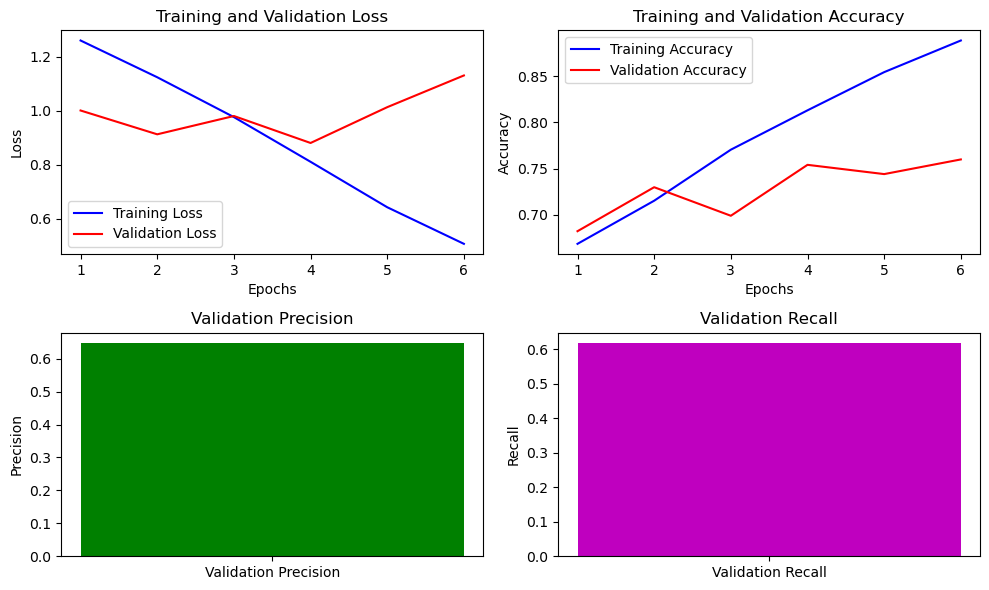

In [15]:
from sklearn.metrics import precision_score, recall_score

# Get the training metrics
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Get the validation metrics
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Compute precision and recall on the validation data
val_predictions = model.predict(val_preprocessed)
val_predictions = (val_predictions > 0.5).astype(int)
val_precision = precision_score(validation_data_labels, val_predictions,average='micro')
val_recall = recall_score(validation_data_labels, val_predictions, average='micro')

# Plot the metrics
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Precision
plt.subplot(2, 2, 3)
plt.bar(['Validation Precision'], [val_precision], color='g')
plt.title('Validation Precision')
plt.ylabel('Precision')

# Plot Recall
plt.subplot(2, 2, 4)
plt.bar(['Validation Recall'], [val_recall], color='m')
plt.title('Validation Recall')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

In [ ]:
# del model
# !mkdir -p model
# model.save('model/my_model')

In [16]:
def load_dataset_test(file_name):
    data = []
    with open(file_name, encoding='utf8') as f:
        for line in f:
            example = json.loads(line)
            post_text = example['postText'][0]
            title = example['targetTitle']
            id = example['id']
            paragraphs = ' '.join(example['targetParagraphs'])
            # label = example['tags'][0] if 'tags' in example else None
            # if label in ['phrase', 'multi', 'passage']:
            data.append({'id': id, 'text': post_text + ' - ' + title + paragraphs})
    return pd.DataFrame(data)

test_data = load_dataset_test('/kaggle/input/clickbait-detection-msci641-s23/test.jsonl')

 

In [17]:


# characters = ['!','"','#','$','%','&','(',')','*','+','/',':',';','<','=','>','@','^','`','|','~','\t','[',']','{','}','\\','.','-']

# for i in X_test:
#     for j in characters:
#         i[0] = i[0].replace(j,"")
# print(len(X_test))  

test_text = test_data['text']

test_data_task1 = test_text.apply(tokenize_text)
test_data_task1 = test_data_task1.apply(lowercase_tokens)
test_data_task1 = test_data_task1.apply(remove_punctuations)
test_data_task1 = test_data_task1.apply(remove_numbers)
# test_data_task1 = test_data_task1.apply(remove_stopwords)
test_data_task1 = test_data_task1.apply(remove_spaces)
test_data_task1 = test_data_task1.apply(lemmatize_tokens)

test_data_task1 = test_data_task1.apply(lambda tokens: ' '.join(token + ' ' for token in tokens))

def test_process(df):
    list1=[]
    for x in test_data_task1:
        list1.append([x])
    return np.asarray(list1)
X_test = test_process(test_data_task1)
print(len(X_test))

400


In [18]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/model')
y_pred = model.predict(X_test)

#print(len(y_pred))

13/13 [==============================] - 16s 963ms/step


In [19]:
lst1=[]
for i in y_pred:
    if i[0]>i[1] and i[0]>i[2]:
        lst1.append('phrase')
    if i[1]>i[0] and i[1]>i[2]:
        lst1.append('multi')
    if i[2]>i[0] and i[2]>i[1]:
        lst1.append('passage')

print(len(lst1))        
df_1 = pd.DataFrame(lst1, columns=['spoilerType'])
print(df_1)

# model = tf.keras.models.load_model('/kaggle/working/model')
# y_pred_1 = model.evaluate(val_preprocessed, validation_data_labels)
final_df = pd.concat([test_data, df_1], axis=1)
final_df_1=final_df.drop(['text'], axis=1)
print(final_df_1)

final_df_1.to_csv('prediction_task1.csv', index=False)

400
    spoilerType
0         multi
1       passage
2        phrase
3        phrase
4       passage
..          ...
395     passage
396      phrase
397      phrase
398     passage
399      phrase

[400 rows x 1 columns]
      id spoilerType
0      0       multi
1      1     passage
2      2      phrase
3      3      phrase
4      4     passage
..   ...         ...
395  395     passage
396  396      phrase
397  397      phrase
398  398     passage
399  399      phrase

[400 rows x 2 columns]


In [ ]:
# Bert layers
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# kernel_regularizer=tf.keras.regularizers.L2(0.01)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l1 = tf.keras.layers.Dense(512, activation='leaky_relu', name='intermediate_layer_lstm')(outputs['sequence_output'])
# l2 = tf.keras.layers.Dropout(0.1)(l1)
l3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=None))(l1)
# l4 = tf.keras.layers.BatchNormalization(axis=2)(l3)
# l5 = tf.keras.layers.Dropout(0.2)(l4)
l6 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=None))(l3)
# l7 = tf.keras.layers.BatchNormalization(axis=2)(l6)
# l8 = tf.keras.layers.Dropout(0.2)(l7)
l9 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, kernel_regularizer=None))(l6)
# l10 = tf.keras.layers.BatchNormalization(axis=1)(l9)
# l11 = tf.keras.layers.Dropout(0.2)(l10)
l12 = tf.keras.layers.Dense(128, activation='leaky_relu')(l9)
# l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l12)

# CNN Model
cnn_layer = tf.keras.layers.Dense(32, activation='relu', name='intermediate_layer_cnn')(outputs['sequence_output'])
cnn_layer = Conv1D(128, 5, activation='relu')(cnn_layer)
cnn_layer = MaxPooling1D(pool_size=4)(cnn_layer)
cnn_layer = Conv1D(128, 5, activation='relu')(cnn_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)
cnn_output = Dropout(0.2)(cnn_layer)

concatenated = tf.keras.layers.concatenate([l12, cnn_output])
ensemble_layer = Dense(64, activation='relu')(concatenated)
ensemble_layer = Dropout(0.2)(ensemble_layer)
ensemble_layer = Dense(3, activation='softmax', name="output")(ensemble_layer)


# Use inputs and outputs to construct a final model
model_ensemble = tf.keras.Model(inputs=[text_input], outputs = [ensemble_layer])

# Freeze the pre-trained BERT layers
# model.layers[1].trainable = False

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name="accuracy"),
      #tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy"),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model_ensemble.compile(optimizer=tf.keras.optimizers.experimental.AdamW(learning_rate=0.003),
              loss='categorical_crossentropy',
              metrics=METRICS)

# Set class weights
class_weights = {0: 1.0, 1: 5.0, 2: 1.0}  # Adjust the weights according to the imbalance

# Set threshold for classification
threshold = 0.5  # Experiment with different threshold values

# Compile the model with binary cross-entropy loss
model_ensemble.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)


In [ ]:
model_ensemble.fit(train_preprocessed, train_data_labels, class_weight=class_weights, epochs=15, batch_size=100, validation_data=(val_preprocessed, validation_data_labels))

In [ ]:
import pandas as pd
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Masking, LSTM
from tensorflow.keras.optimizers import Adam
    
def load_dataset(file_name):
    ret = []
    
    with open(file_name, encoding='utf8') as f:
        for i in f:
            i = json.loads(i)
            query = i['postText']
            spoiler = i['spoiler']
            paragraphs = i['targetParagraphs']
            
            if i['tags'][0] == 'multi':
                continue
                
            assert len(query) == 1
            query = query[0]

            if len(spoiler) != 1:
                spoiler = ' '.join(spoiler)
            else:
                spoiler = spoiler[0]
                
            if os.path.basename(file_name) == 'train.jsonl':
                ret.append({'query': query, 'uuid': i['uuid'], 'paragraphs': paragraphs, 'spoiler': spoiler})
            elif os.path.basename(file_name) == 'val.jsonl':
                ret.append({'query': query, 'paragraphs': paragraphs, 'spoiler': spoiler})
            
    return pd.DataFrame(ret)

def load_dataset_test(file_name):
    import json
    ret = []
    
    with open(file_name, encoding='utf8') as f:
        for i in f:
            i = json.loads(i)
            query = i['postText']
            paragraphs = i['targetParagraphs']
       
            assert len(query) == 1
            query = query[0]
    
            # ret += [{'query': query, 'uuid': i['uuid'], 'paragraphs': paragraphs, 'spoiler': spoiler}]
            ret += [{'query': query, 'paragraphs': paragraphs}]
            
    return pd.DataFrame(ret)


train_data = load_dataset('/kaggle/input/clickbait-detection-msci641-s23/train.jsonl')
validation_data = load_dataset('/kaggle/input/clickbait-detection-msci641-s23/val.jsonl')
test_data = load_dataset_test('/kaggle/input/clickbait-detection-msci641-s23/test.jsonl')
all_datasets = pd.concat([test_data, train_data, validation_data])

In [ ]:
train_data

In [ ]:
validation_data

In [ ]:
test_data
len(test_data)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
# Tokenize the text
import itertools

# Combine the non-empty texts from 'query', 'paragraphs', and 'spoiler' columns
texts = itertools.chain.from_iterable(
    filter(lambda x: isinstance(x, str), all_datasets['query'])
)
texts = itertools.chain(
    texts,
    *filter(lambda x: isinstance(x, list), all_datasets['paragraphs'])
)
texts = itertools.chain(
    texts,
    *filter(lambda x: isinstance(x, list), all_datasets['spoiler'])
)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

query_sequences = tokenizer.texts_to_sequences(train_data['query'])
paragraph_sequences = tokenizer.texts_to_sequences(train_data['paragraphs'])
spoiler_sequences = tokenizer.texts_to_sequences(train_data['spoiler'])

# Pad sequences
max_sequence_length = max(max(len(seq) for seq in query_sequences),
                          max(len(seq) for seq in paragraph_sequences))
print(max_sequence_length)
query_sequences = pad_sequences(query_sequences, maxlen=max_sequence_length, padding='post')
print(len(query_sequences))
paragraph_sequences = pad_sequences(paragraph_sequences, maxlen=max_sequence_length, padding='post')
spoiler_sequences = pad_sequences(spoiler_sequences, maxlen=max_sequence_length, padding='post')
print(len(spoiler_sequences))


In [ ]:

# Prepare training data
x_train = [query_sequences, paragraph_sequences]
# Convert the list to NumPy arrays if they are not already
x_train_arr = [np.array(x) for x in x_train]

# Get the shape of each array
shapes = [x.shape for x in x_train_arr]

# Print the shapes
for i, shape in enumerate(shapes):
    print(f"Shape of x_train[{i}]: {shape}")
y_train = spoiler_sequences

# Assuming y_train is a NumPy array
y_train_arr = np.array(spoiler_sequences)

# Get the shape of y_train
y_shape = y_train_arr.shape

# Print the shape
print("Shape of y_train:", y_shape)

# Define the model architecture
embedding_dim = 128
hidden_units = 256
num_heads = 8
num_blocks = 4


In [ ]:

# Input layers
query_input = Input(shape=(max_sequence_length,), name='query_input')
paragraph_input = Input(shape=(max_sequence_length,), name='paragraph_input')

# Embedding layers
print(len(tokenizer.word_index))
embedding = Embedding(len(tokenizer.word_index) + 1, embedding_dim)
query_embedded = embedding(query_input)
paragraph_embedded = embedding(paragraph_input)

# Masking layer
masking = Masking(mask_value=0)


In [ ]:

# Transformer layers
for _ in range(num_blocks):
    attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_units)
    query_attention = attention(query_embedded, query_embedded)
    paragraph_attention = attention(paragraph_embedded, paragraph_embedded)
    query_embedded = tf.keras.layers.LayerNormalization(epsilon=1e-6)(query_embedded + query_attention)
    paragraph_embedded = tf.keras.layers.LayerNormalization(epsilon=1e-6)(paragraph_embedded + paragraph_attention)

# LSTM layer
lstm = LSTM(hidden_units)
query_encoded = lstm(query_embedded)
paragraph_encoded = lstm(paragraph_embedded)

query_train_sequences = pad_sequences(query_sequences, maxlen=max_sequence_length, padding='post')
paragraph_train_sequences = pad_sequences(paragraph_sequences, maxlen=max_sequence_length, padding='post')



In [ ]:
# Concatenate encoded representations
concatenated = tf.keras.layers.Concatenate()([query_encoded, paragraph_encoded])

# Output layer
output = Dense(len(tokenizer.word_index) + 1, activation='softmax')(concatenated)
# output = Dense(max_sequence_length, activation='softmax')(concatenated)

# Create the model
model = Model(inputs=[query_input, paragraph_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [ ]:
model.summary()

In [ ]:
shapes = [x.shape for x in x_train_arr]

# Print the shapes
for i, shape in enumerate(shapes):
    print(f"Shape of x_train[{i}]: {shape}")
print('y_train shape: ', y_train.shape)

In [ ]:

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Generate spoilers for the test data
query_test_sequences = tokenizer.texts_to_sequences(test_data['query'])
paragraph_test_sequences = tokenizer.texts_to_sequences(test_data['paragraphs'])
query_test_sequences = pad_sequences(query_test_sequences, maxlen=max_sequence_length, padding='post')
paragraph_test_sequences = pad_sequences(paragraph_test_sequences, maxlen=max_sequence_length, padding='post')

# Make predictions on the test data
test_predictions = model.predict([query_test_sequences, paragraph_test_sequences])
decoded_spoilers = tokenizer.sequences_to_texts(np.argmax(test_predictions, axis=2))



In [ ]:

# Print the generated spoilers for the test data
for index, row in test_data.iterrows():
    query = row['query']
    paragraphs = row['paragraphs']
    predicted_spoiler = decoded_spoilers[index]
    
    print("Query:", query)
    print("Paragraphs:", paragraphs)
    print("Predicted Spoiler:", predicted_spoiler)
    print()
